<a href="https://colab.research.google.com/github/verastudio/G2-finalproject/blob/main/Keyword_Wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
pip install gspread gspread-dataframe oauth2client wordcloud

In [9]:
from google.colab import drive
drive.mount('from google.colab import drive
drive.mount('/content/drive')')

Mounted at /content/drive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Downloading...
From: https://drive.google.com/uc?id=1AzRk0vplpRIeWSBPJyXz0AMa5cg2IwUJ
To: /content/credentials.json
100%|██████████| 2.36k/2.36k [00:00<00:00, 6.87MB/s]


File found: credentials.json
Google Sheets client authenticated successfully.
Column names in the sheet: ['타임스탬프', '이메일 주소', '1.  Select the 1-2 most important keyword from the options given.\n   \nAudio File #1', '2.  Select the 1-2 most important keyword from the options given.\n\nAudio File #2', '3.  Select the 1-2 most important keyword from the options given.\n\nAudio File #3', '4.  Select the 1-2 most important keyword from the options given.\n\nAudio File #4', '5.  Select the 1-2 most important keyword from the options given.\n\nAudio File #5']


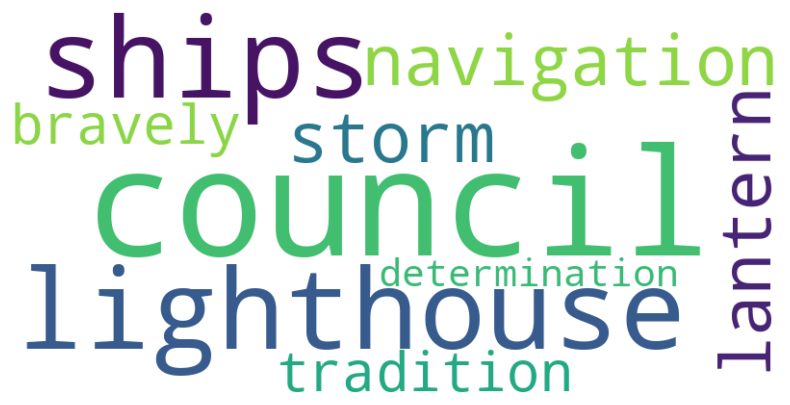

In [13]:
# Install required libraries
!pip install gspread oauth2client gdown

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Download the credentials file from Google Drive using gdown
import gdown

# Convert shared link to direct download link
file_id = '1AzRk0vplpRIeWSBPJyXz0AMa5cg2IwUJ'
download_url = f'https://drive.google.com/uc?id={file_id}'
destination = 'credentials.json'
gdown.download(download_url, destination, quiet=False)

import gspread
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Path to your downloaded credentials JSON file
CREDENTIALS_FILE = destination

# Verify the path to the credentials file
if not os.path.exists(CREDENTIALS_FILE):
    print(f"File not found: {CREDENTIALS_FILE}")
else:
    print(f"File found: {CREDENTIALS_FILE}")

# Authenticate and initialize the Google Sheets client
scope = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/drive"]
creds = ServiceAccountCredentials.from_json_keyfile_name(CREDENTIALS_FILE, scope)
client = gspread.authorize(creds)
print("Google Sheets client authenticated successfully.")

# Google Sheets ID and worksheet name
SHEET_ID = '1X7xG9AxwFnLqphOw2DJbw1gXG5UPpKgo7ZNqZ6a4HJQ'  # Your actual Google Sheet ID
WORKSHEET_NAME = 'sheet1'  # Your worksheet name

def fetch_data_and_generate_wordcloud():
    try:
        # Open the Google Sheet
        sheet = client.open_by_key(SHEET_ID)
        # Select the worksheet
        worksheet = sheet.worksheet(WORKSHEET_NAME)

        # Fetch the data from the worksheet
        data = worksheet.get_all_values()
        headers = data.pop(0)
        df = pd.DataFrame(data, columns=headers)

        # Print the column names to debug
        print("Column names in the sheet:", df.columns.tolist())

        # Combine words under the specific columns
        columns_to_collect = [
            "1.  Select the 1-2 most important keyword from the options given.\n   \nAudio File #1",
            "2.  Select the 1-2 most important keyword from the options given.\n\nAudio File #2",
            "3.  Select the 1-2 most important keyword from the options given.\n\nAudio File #3",
            "4.  Select the 1-2 most important keyword from the options given.\n\nAudio File #4",
            "5.  Select the 1-2 most important keyword from the options given.\n\nAudio File #5"
        ]

        # Combine text from all specified columns
        text = ' '.join(df[column].str.cat(sep=' ') for column in columns_to_collect)

        # Generate the word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

        # Display the word cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.show()

    except Exception as e:
        print(f"Error during data fetching or word cloud generation: {e}")

# Call the function to fetch data and generate word cloud
fetch_data_and_generate_wordcloud()




